In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#keras
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import initializers

#sklearn (Sci-kit learn)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# for combining all the hyper-parameters
import itertools

In [2]:
#Extracting the training and test sets
#train_df = pd.read_csv('data/ML-CUP20-TR.csv').to_numpy()
train_df = pd.read_csv('data/ML-CUP20-TR.csv', header=None).to_numpy()
test_df = pd.read_csv('data/ML-CUP20-TS.csv').to_numpy()

In [3]:
pd.DataFrame(data=train_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,-1.227729,0.740105,0.453528,-0.761051,-0.537705,1.471803,-1.143195,2.034647,1.603978,-1.399807,58.616635,-36.878797
1,2.0,-1.138424,0.401816,2.186819,-1.827160,-1.051730,-0.465455,-1.186131,0.430193,1.344390,-0.886397,75.310457,-27.210492
2,3.0,-0.932510,1.226327,1.086944,-0.638613,-0.917756,-0.292441,-1.434838,0.461744,0.771817,-1.385428,68.513133,-31.582073
3,4.0,-1.037358,1.370826,0.945194,-0.380548,-0.490811,0.370115,-0.312516,2.617978,1.347718,-0.583328,57.655634,-37.409493
4,5.0,0.484440,0.192628,-0.348715,1.578780,0.485438,-0.340264,0.189964,-0.240548,-0.701919,1.439752,43.327791,-35.763594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1520.0,0.938149,-2.146722,-1.284843,0.123335,0.573836,-0.535459,0.720920,-1.364913,-0.971705,0.238846,28.914647,-7.531644
1520,1521.0,1.065179,-1.482392,-0.469370,-0.449872,0.260386,0.036954,1.226607,-0.919074,-1.486910,1.885093,34.994708,-23.832616
1521,1522.0,-0.920735,0.130270,1.057556,-1.322965,-1.646272,-0.389996,-1.447411,0.335906,1.309321,-1.341631,72.885485,-28.704528
1522,1523.0,-1.088826,1.850026,0.443968,-1.867511,-1.390189,-0.184824,-0.714050,1.857179,1.153889,-0.820186,62.954814,-34.902101


In [4]:
#Preparing train_df for training
train_dataset = train_df[:, 1:11]
train_labelset = train_df[:, 11:13]
#Preparing test_df for testing
test_dataset = test_df[:, 1:10]

In [5]:
train_dataset_df = pd.DataFrame(data=train_dataset)

In [6]:
train_labelset_df = pd.DataFrame(data=train_labelset)

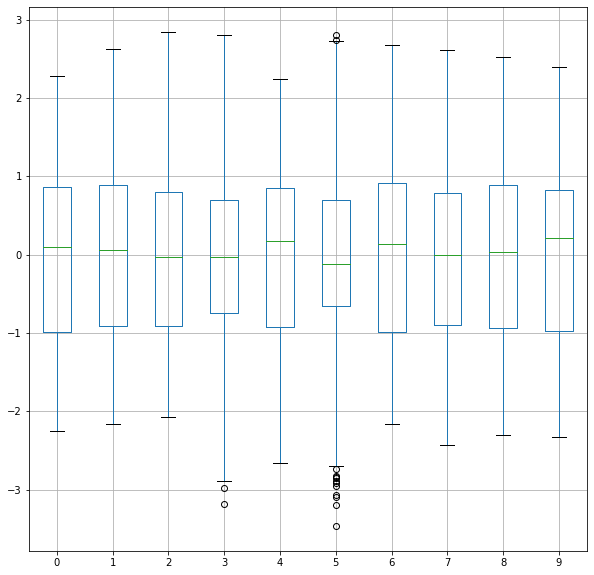

In [7]:
### Preprocessing
train_dataset_df.boxplot(figsize=(10, 10))

In [8]:
def iqr_values(s): 
    q1 = s.quantile(q = 0.25)
    q3 = s.quantile(q = 0.75)
    iqr = q3 - q1
    iqr_left = q1 - 1.5*iqr
    iqr_right = q3 + 1.5*iqr
    return iqr_left, iqr_right

In [9]:
train_dataset_df

,0,1,2,3,4,5,6,7,8,9
0,-1.227729,0.740105,0.453528,-0.761051,-0.537705,1.471803,-1.143195,2.034647,1.603978,-1.399807
1,-1.138424,0.401816,2.186819,-1.827160,-1.051730,-0.465455,-1.186131,0.430193,1.344390,-0.886397
2,-0.932510,1.226327,1.086944,-0.638613,-0.917756,-0.292441,-1.434838,0.461744,0.771817,-1.385428
3,-1.037358,1.370826,0.945194,-0.380548,-0.490811,0.370115,-0.312516,2.617978,1.347718,-0.583328
4,0.484440,0.192628,-0.348715,1.578780,0.485438,-0.340264,0.189964,-0.240548,-0.701919,1.439752
...,...,...,...,...,...,...,...,...,...,...
1519,0.938149,-2.146722,-1.284843,0.123335,0.573836,-0.535459,0.720920,-1.364913,-0.971705,0.238846
1520,1.065179,-1.482392,-0.469370,-0.449872,0.260386,0.036954,1.226607,-0.919074,-1.486910,1.885093
1521,-0.920735,0.130270,1.057556,-1.322965,-1.646272,-0.389996,-1.447411,0.335906,1.309321,-1.341631
1522,-1.088826,1.850026,0.443968,-1.867511,-1.390189,-0.184824,-0.714050,1.857179,1.153889,-0.820186


In [10]:
left, right = iqr_values(train_dataset_df[5])
outliers = train_dataset_df[(train_dataset_df[5] < left) | (train_dataset_df[5] > right)]

In [11]:
train_dataset_df_no_out = train_dataset_df.drop(outliers.index)
print(train_dataset_df_no_out.info())
train_labelset_df_no_out = train_labelset_df.drop(outliers.index)
print(train_labelset_df_no_out.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 1523
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1511 non-null   float64
 1   1       1511 non-null   float64
 2   2       1511 non-null   float64
 3   3       1511 non-null   float64
 4   4       1511 non-null   float64
 5   5       1511 non-null   float64
 6   6       1511 non-null   float64
 7   7       1511 non-null   float64
 8   8       1511 non-null   float64
 9   9       1511 non-null   float64
dtypes: float64(10)
memory usage: 129.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 1523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1511 non-null   float64
 1   1       1511 non-null   float64
dtypes: float64(2)
memory usage: 35.4 KB
None


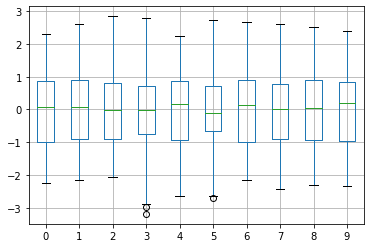

In [12]:
train_dataset_df_no_out.boxplot()

In [21]:
### Model Definition
def create_model(
                    lr=0.1, 
                    num_hidden_units=4,
                    num_hidden_units2=4,
                    activation_hidden="relu", 
                    activation_hidden2="relu", 
                    activation_out="sigmoid",
                    momentum=0.7, 
                    decay=0.01
                ):
    # create model
    model = Sequential()
    initializer = initializers.GlorotNormal(seed=1) # has the parameter of seed to produce the same random sample.
    model.add(Dense(units=num_hidden_units, kernel_initializer=initializer, input_dim=10, activation=activation_hidden))
    model.add(Dense(units = num_hidden_units2,activation = activation_hidden2))
    model.add(Dense(2, activation=activation_out)) 

    #optimizer
    sgd = SGD(lr=lr, momentum=momentum, nesterov=False)  # We can add decay to hyper parameter list to get optimum value. 

    # Compile model
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
    return model

In [ ]:
### Screening Phase

In [19]:
# methods for the screening phase 

def plot_accuracy_two_params(history, title, ax):
    plt.subplot(ax)
    plt.plot(history.history['accuracy'], label='TR_set')
    plt.plot(history.history['val_accuracy'], label='VL_set')
    ax.set_title('Model Accuracy ' + title)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(loc='best')

def plot_loss_two_params(history, title, ax):
    plt.subplot(ax)
    plt.plot(history.history['loss'], label='TR_set')
    plt.plot(history.history['val_loss'], label='VL_set')
    ax.set_title('Model Loss (MSE) ' + title)
    ax.set_ylabel('MSE')
    ax.set_xlabel('Epoch')
    ax.legend(loc='best')

def screening_phase(par_a, values_a, par_b, values_b, plot_function=plot_loss_two_params):
    num_values_a = len(values_a)
    num_values_b = len(values_b)
    f, axs = plt.subplots(nrows= num_values_a, ncols=num_values_b, figsize=(8*num_values_b, 5*num_values_a))
    for i in range(num_values_a):
        for j in range(num_values_b):
            params = {par_a : values_a[i], par_b : values_b[j]}
            model = KerasClassifier(build_fn=create_model, **params)
            history = model.fit(train_dataset_df_no_out.values, train_labelset_df_no_out.values, validation_split=0.25, shuffle=True, epochs=90, batch_size=10, verbose=0)
            plot_title = '[' + par_a + ' = ' + str(values_a[i]) + '] [' + par_b + ' = ' + str(values_b[j]) + ']' 
            plot_function(history, plot_title, axs[i][j])
    plt.show()

In [ ]:
screening_phase( 'num_hidden_units', [4,10],'activation_out', ['tanh','sigmoid','relu','softmax'])

In [ ]:
screening_phase('lr', [0.1,0.2,0.3,0.4], 'activation_hidden', ['tanh','sigmoid','relu','softmax'])

In [ ]:
screening_phase('lr', [0.1,0.2,0.3,0.4], 'momentum', [0.1,0.2,0.3,0.4,0.5,0.6,0.7])

In [ ]:
### Grid-search